### Genetic Algorithm for CbCM game fitting


In [36]:
import pickle
from corpgame import PolymatrixGame
import numpy as np
from sklearn.metrics import mean_squared_error

y_true=np.array([[-14, -12,   1,   0,   6,   7,  27,  -6, -13, -14],
       [  1,   4,   8,   6,   7,  31, -24, -22, -16,   2],
       [ 27,  27,  24,  16,  14,  17,  15,  30,  73,  28],
       [ 11,  11,  24,  12,  15,   0,   7,   9, -11,  11],
       [  2,   2,  -1,  11,  -9,   7,  -6,  -3, -12,  -2],
       [ -8,  -8, -11,  14,  20,  -4,  -5,  -1, -30,  -8],
       [-12, -12, -10, -28, -40, -25,  -1,  -7, -17, -12],
       [ 12,  12,   7,   3,   9,  11,  13,  14,  14,  13],
       [ -2,  -2,  -3,  -3,   7,   3,   1,   9,   8,  -2],
       [ 11,   9,   9,   8,  14,   2,  12,  16,  12,  11],
       [ -5,  -4,  -3,  -2, -15,  -8,  -2,  -8, -10,  -4],
       [ -7,  -7,  -1,  -3,  -8,  -2,  -1, -12,   0,  -6],
       [  4,   3,   2,   0,   6,  -4,   3,   5,   2,   2],
       [ -4,  -4,  -4,  -4,   2,  -2,  -4,  -3,  -8,  -4],
       [ -2,  -2, -11, -12, -12, -16, -18, -10,   1,  -2],
       [ -2,  -5, -22,  -9,  -9, -10, -11,  -7,   2,  -3],
       [ -2,  -2,  -2,  -2,   0,   2,   0,  10,  10,   0],
       [-10, -10,  -7,  -7,  -7,  -9,  -6, -14,  -5, -10]])

def evaluate(hypothesis):
        strategies = hypothesis['strategies']
        starting_state = hypothesis['starting_state']
        game_settings = {
            "start_populations_matrix": list(starting_state),
            "topology": hypothesis['topology'],
            'alpha': hypothesis['alpha'],
            'log_level': "warning"
        }
        game = PolymatrixGame(**game_settings)
        outcomes = []
        for iteration, strategy in enumerate(strategies):
            strategy = strategy[0]
            game.play(strategy)
            payoff = game.payoff_matrix.sum(axis=1).transpose().reshape(n,1)
            outcomes.append(payoff)
        y_pred = np.hstack(outcomes)
        err = mean_squared_error(y_true, y_pred)
        return err
n = 18

In [38]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [53]:
import pickle
population = pickle.load(open('./data/optimization/population_chain_3_9.553.pickle','rb'))
A = list(np.arange(0.20,0.30,0.001))
A = list(np.arange(0.26,0.29,0.0001))
#A = list(np.arange(0.05,0.4,0.01))

In [54]:
Y=[]
for k in [0]:
    hypothesis = population[k]
    y = []
    for alpha in A:
        strategies = hypothesis['strategies']
        starting_state = hypothesis['starting_state']
        game_settings = {
            "start_populations_matrix": list(starting_state),
            "topology": "fully_connected",
            'alpha': alpha,
            'log_level': "warning"
        }
        game = PolymatrixGame(**game_settings)
        outcomes = []
        for iteration, strategy in enumerate(strategies):
            strategy = strategy[0]
            game.play(strategy)
            payoff = game.payoff_matrix.sum(axis=1).transpose().reshape(n,1)
            outcomes.append(payoff)
        y_pred = np.hstack(outcomes)
        err = mean_squared_error(y_true, y_pred)
        y.append(err)
        print(k, alpha, err)
    Y.append(y)


0 0.26 95.27777777777779
0 0.2601 95.27777777777779
0 0.2602 95.27777777777779
0 0.2603 94.47777777777779
0 0.26039999999999996 94.47777777777779
0 0.26049999999999995 94.47777777777779
0 0.26059999999999994 94.47777777777779
0 0.26069999999999993 94.47777777777779
0 0.2607999999999999 94.47777777777779
0 0.2608999999999999 94.47777777777779
0 0.2609999999999999 94.47777777777779
0 0.2610999999999999 94.47777777777779
0 0.2611999999999999 94.47777777777779
0 0.26129999999999987 94.47777777777779
0 0.26139999999999985 94.47777777777779
0 0.26149999999999984 94.47777777777779
0 0.26159999999999983 93.84444444444443
0 0.2616999999999998 93.84444444444443
0 0.2617999999999998 93.84444444444443
0 0.2618999999999998 93.84444444444443
0 0.2619999999999998 93.84444444444443
0 0.2620999999999998 93.84444444444443
0 0.26219999999999977 93.84444444444443
0 0.26229999999999976 93.84444444444443
0 0.26239999999999974 93.84444444444443
0 0.26249999999999973 93.84444444444443
0 0.2625999999999997 93.

0 0.2818999999999976 95.0111111111111
0 0.2819999999999976 95.0111111111111
0 0.2820999999999976 95.0111111111111
0 0.28219999999999756 95.0111111111111
0 0.28229999999999755 95.0111111111111
0 0.28239999999999754 95.0111111111111
0 0.28249999999999753 95.0111111111111
0 0.2825999999999975 95.0111111111111
0 0.2826999999999975 95.0111111111111
0 0.2827999999999975 95.0111111111111
0 0.2828999999999975 95.0111111111111
0 0.2829999999999975 95.0111111111111
0 0.28309999999999746 95.0111111111111
0 0.28319999999999745 95.0111111111111
0 0.28329999999999744 95.0111111111111
0 0.28339999999999743 93.96666666666667
0 0.2834999999999974 93.96666666666667
0 0.2835999999999974 93.96666666666667
0 0.2836999999999974 93.96666666666667
0 0.2837999999999974 93.96666666666667
0 0.2838999999999974 93.96666666666667
0 0.28399999999999737 93.96666666666667
0 0.28409999999999735 93.96666666666667
0 0.28419999999999734 93.96666666666667
0 0.28429999999999733 93.96666666666667
0 0.2843999999999973 93.9666

In [55]:
results = {i:[] for i in range(len(Y))}
for i, y in enumerate(Y):
    results[i] = y

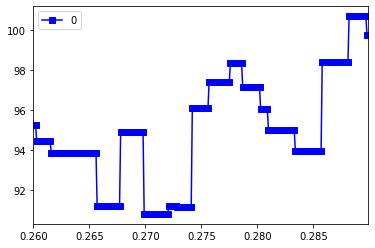

In [56]:
import pandas as pd
style = ['bs-','ro-','y^-']
df = pd.DataFrame(results, index=A)
pd.DataFrame(df).plot.line(style=style)

In [13]:
population = population[0:10]
population = mutate_population(population)
population.extend(create_population(30))

In [5]:
best = 1000

#population = create_population(50)

for i in range(3):
    print('1. Evaluating')
    for i, p in enumerate(population):
        if i%5==0:
            print(f"{i}/{len(population)}")
        if population[i]['error'] == None:
            population[i]['error'] = evaluate(p)
    print('2. Sorting')
    population.sort(key=lambda x: x['error'])
    print('TOP 10 Error rates:')
    for i, p in enumerate(population[0:10]):
        print(i, p['error'])
    population = population[0:20]
    if best!=population[0]['error']:
        best = population[0]['error']
        pickle.dump(population, open(f'./data/optimization/population_alpha_{int(best)}.pickle','wb'))
    population = remove_clones(population)
    print('3. Expanding')
    population = mutate_population(population)
    population.extend(create_population(30))
    print()

1. Evaluating
0/51
5/51
10/51
15/51
20/51
25/51
30/51
35/51
40/51
45/51
50/51
2. Sorting
TOP 10 Error rates:
0 149.9111111111111
1 149.9111111111111
2 149.9111111111111
3 150.9222222222222
4 151.77777777777777
5 153.05555555555554
6 153.05555555555554
7 153.05555555555554
8 154.2111111111111
9 154.72222222222223
3. Expanding

1. Evaluating
0/51
5/51
10/51
15/51
20/51
25/51
30/51
35/51
40/51
45/51
50/51
2. Sorting
TOP 10 Error rates:
0 149.9111111111111
1 150.9222222222222
2 151.62222222222223
3 151.77777777777777
4 152.28888888888892
5 152.28888888888892
6 152.28888888888892
7 156.65555555555557
8 156.65555555555557
9 156.65555555555557
3. Expanding

1. Evaluating
0/51
5/51
10/51
15/51
20/51
25/51
30/51
35/51
40/51
45/51
50/51
2. Sorting
TOP 10 Error rates:
0 149.76666666666665
1 149.9111111111111
2 150.9222222222222
3 151.62222222222223
4 152.51111111111112
5 152.51111111111112
6 152.51111111111112
7 156.8
8 156.8
9 156.8
3. Expanding



In [18]:
for i, p in enumerate(population):
    if i%5==0:
        print(f"{i}/{len(population)}")
    if population[i]['error'] == None:
        population[i]['error'] = evaluate(p)
print('2. Sorting')
population.sort(key=lambda x: x['error'])
print('TOP 10 Error rates:')
for i, p in enumerate(population[0:10]):
    print(i, p['error'])
for p in population:
    print(p['alpha'])

0/47
5/47
10/47
15/47
20/47
25/47
30/47
35/47
40/47
45/47
2. Sorting
TOP 10 Error rates:
0 154.2111111111111
1 156.33333333333331
2 156.33333333333331
3 156.33333333333331
4 157.95555555555558
5 159.6222222222222
6 159.6222222222222
7 159.6222222222222
8 159.6222222222222
9 163.06666666666666
0.11923992359246072
0.1921139637210897
0.1921139637210897
0.1921139637210897
0.10593274773105099
0.03514029590712442
0.03514029590712442
0.03514029590712442
0.0485439789952441
0.09971520767086384
0.09971520767086384
0.09971520767086384
0.08920101856920626
0.10059547198402696
0.10059547198402696
0.10059547198402696
0.14277526012764186
0.14277526012764186
0.14277526012764186
0.20895278155145425
0.2297221555106923
0.22862797332132567
0.27136580005712174
0.20868709401568497
0.3504182111166104
0.32399790047468613
0.2232400240727539
0.4135710561033217
0.2929905373099607
0.24595820050323136
0.4205203201514498
0.46662593762580595
0.4700081064834618
0.45170249218445147
0.5987528246200002
0.5654015172311275

In [19]:
for i, p in enumerate(population[0:10]):
    print(i, p['error'], p['alpha'])

0 154.2111111111111 0.11923992359246072
1 156.33333333333331 0.1921139637210897
2 156.33333333333331 0.1921139637210897
3 156.33333333333331 0.1921139637210897
4 157.95555555555558 0.10593274773105099
5 159.6222222222222 0.03514029590712442
6 159.6222222222222 0.03514029590712442
7 159.6222222222222 0.03514029590712442
8 159.6222222222222 0.0485439789952441
9 163.06666666666666 0.09971520767086384


In [8]:
population[3]

{'starting_state': array([[  0,  29],
        [ 28, 190],
        [ 10,  74],
        [ 70,  69],
        [177, 144],
        [ 42, 114],
        [ 99,  13],
        [104,  78],
        [141,  99],
        [118, 166],
        [184, 164],
        [142,  33],
        [164,  73],
        [132,  78],
        [ 86,  21],
        [ 25, 119],
        [107,  13],
        [ 22, 123]]),
 'strategies': [array([[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1]]),
  array([[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]]),
  array([[1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]]),
  array([[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]]),
  array([[1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]),
  array([[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1]]),
  array([[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]]),
  array([[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0]]),
  array([[1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]]),
  a

In [224]:
float(np.random.rand(1))

0.5071126015216765

In [201]:
population = pickle.load(open('./data/optimization/population_276.pickle','rb'))
for i, p in enumerate(population):
        print(i, p['error'])

0 276.20000000000005
1 299.3222222222222
2 308.9
3 310.46666666666664
4 325.37777777777774
5 341.3444444444445
6 341.64444444444445
7 344.67777777777775
8 347.2444444444444
9 352.6333333333333
10 352.99999999999994
11 353.1777777777778
12 353.4222222222222
13 354.6333333333333
14 355.53333333333336
15 356.94444444444446
16 357.79999999999995
17 359.5111111111111
18 359.5333333333333
19 360.4333333333333


In [163]:
population.sort(key=lambda x: x['error'])
print('Error rates:')
for i, p in enumerate(population[0:20]):
    print(i, p['error'])
trimmed_populations = population[0:20]

Error rates:
0 316.28888888888895
1 343.06666666666666
2 345.19999999999993
3 345.19999999999993
4 354.96666666666664
5 358.8
6 364.91111111111115
7 369.5777777777778
8 376.0444444444445
9 380.0777777777777
10 387.25555555555553
11 387.81111111111113
12 388.8
13 390.1
14 396.4888888888889
15 397.55555555555554
16 403.6333333333333
17 405.8
18 409.5333333333333
19 414.3


In [206]:
population = pickle.load(open('./data/optimization/population_250.pickle','rb'))

In [10]:
hypothesis = population[0]
strategies = hypothesis['strategies']
starting_state = hypothesis['starting_state']
game_settings = {
    "start_populations_matrix": list(starting_state),
    "topology": "fully_connected",
    'alpha': hypothesis['alpha'],
    'log_level': "warning"
}
game = PolymatrixGame(**game_settings)
outcomes = []
for iteration, strategy in enumerate(strategies):
    strategy = strategy[0]
    game.play(strategy)
    payoff = game.payoff_matrix.sum(axis=1).transpose().reshape(n,1)
    outcomes.append(payoff)
y_pred = np.hstack(outcomes)
y_pred

array([[-7., -6.,  5., -4., -8.,  4.,  5., -6., -4., -5.],
       [ 7.,  4.,  5., -4.,  4., -5.,  5., -6., -4., -5.],
       [ 7.,  4.,  5.,  8.,  4.,  3.,  3.,  2.,  3., -5.],
       [ 7.,  5.,  5.,  8.,  4.,  3.,  3.,  8., -4.,  3.],
       [-1., -3., -8.,  2., -2., -6., -5., -2., -4.,  5.],
       [-1., -3., -8., -4., -2., -5., -5., -6., -5., -5.],
       [-7., -3., -8., -4.,  4.,  3., -5., -6.,  3.,  3.],
       [-7., -6.,  5., -4.,  4., -5.,  5.,  8., -4.,  5.],
       [ 7.,  4.,  2.,  2.,  4.,  4.,  5.,  8.,  3.,  5.],
       [ 7.,  4.,  5., -4.,  4.,  4., -5.,  8.,  6.,  5.],
       [ 7.,  4.,  2.,  8.,  4.,  3.,  3.,  8.,  3.,  3.],
       [-7.,  4.,  5., -4., -8.,  4., -5., -6.,  6., -5.],
       [ 3.,  5.,  2.,  2.,  4.,  3.,  5.,  8.,  6.,  3.],
       [ 7., -6.,  5.,  8., -8.,  4., -5., -6.,  6., -5.],
       [-7., -3., -8., -4., -2., -5., -5., -6., -4., -5.],
       [-7., -6., -8.,  2.,  4.,  3.,  3.,  2.,  3.,  5.],
       [-7., -3., -3., -4., -8., -6., -5., -6., -5., -5.

In [15]:
mean_squared_error(y_pred, y_true)

149.76666666666665

In [12]:
evaluate(population[0])

149.76666666666665

In [210]:
from file_read_backwards import FileReadBackwards

with FileReadBackwards("CbCM.log", encoding="utf-8") as frb:
    counter = 0
    for l in frb:
        print(l)
        counter +=1
        if counter==1000:
            break



2020-06-05 02:27:59,000 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=-1
2020-06-05 02:27:58,999 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (0,1)
2020-06-05 02:27:58,999 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [ 2. -3.] [-2.  3.]
2020-06-05 02:27:58,999 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [0] 2 [ 2. -3.] [-2.  3.]
2020-06-05 02:27:58,999 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=2
2020-06-05 02:27:58,999 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [1] 3 [ 0. -3.] [0. 3.]
2020-06-05 02:27:58,998 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=3
2020-06-05 02:27:58,998 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (0,1)
2020-06-05 02:27:58,998 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payo

2020-06-05 02:27:58,972 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 13 should get [-7. 15.]
2020-06-05 02:27:58,972 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 13 old state [20 61]
2020-06-05 02:27:58,972 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 12 new state [23 44]
2020-06-05 02:27:58,971 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 12 should get [-14.  15.]
2020-06-05 02:27:58,971 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 12 old state [37 29]
2020-06-05 02:27:58,971 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 11 new state [15 -4]
2020-06-05 02:27:58,971 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 11 should get [20.  0.]
2020-06-05 02:27:58,971 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.apply_payoff_matrix() player 11 old sta

2020-06-05 02:27:58,947 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [ 1. -5.] [-1.  5.]
2020-06-05 02:27:58,947 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [0] 1 [ 1. -5.] [-1.  5.]
2020-06-05 02:27:58,946 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=1
2020-06-05 02:27:58,946 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [1] 5 [ 0. -5.] [0. 5.]
2020-06-05 02:27:58,946 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=5
2020-06-05 02:27:58,946 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (0,1)
2020-06-05 02:27:58,946 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [ 2. -5.] [-2.  5.]
2020-06-05 02:27:58,945 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [0] 2 [ 2. -5.] [-2.  5.]
2020-06-05 02:27:58,945 - CbCM - DEBUG - <class 'corpgame.Polyma

2020-06-05 02:27:58,915 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (1,0)
2020-06-05 02:27:58,915 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,915 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,914 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,914 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,914 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [-3.  0.] [3. 0.]
2020-06-05 02:27:58,914 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [1] 0 [-3.  0.] [3. 0.]
2020-06-05 02:27:58,913 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,913 - CbCM - DEBUG - <class 'corpgame.Polyma

2020-06-05 02:27:58,885 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,885 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,884 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 2.] [ 0. -2.]
2020-06-05 02:27:58,884 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [1] 2 [0. 2.] [ 0. -2.]
2020-06-05 02:27:58,883 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=2
2020-06-05 02:27:58,883 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [0] 0 [0. 0.] [0. 0.]
2020-06-05 02:27:58,883 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,883 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (1,0)
2020-06-05 02:27:58,883 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_pay

2020-06-05 02:27:58,851 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,851 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (0,1)
2020-06-05 02:27:58,851 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [3. 0.] [-3.  0.]
2020-06-05 02:27:58,851 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [0] 3 [3. 0.] [-3.  0.]
2020-06-05 02:27:58,850 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=3
2020-06-05 02:27:58,850 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [1] 0 [0. 0.] [0. 0.]
2020-06-05 02:27:58,850 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,850 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (0,1)
2020-06-05 02:27:58,850 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0.

2020-06-05 02:27:58,825 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,825 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (1,0)
2020-06-05 02:27:58,825 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,824 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 1.] [ 0. -1.]
2020-06-05 02:27:58,824 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [1] 1 [0. 1.] [ 0. -1.]
2020-06-05 02:27:58,824 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=1
2020-06-05 02:27:58,824 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [0] 0 [0. 0.] [0. 0.]
2020-06-05 02:27:58,823 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,823 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pa

2020-06-05 02:27:58,781 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=2
2020-06-05 02:27:58,781 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [0] 0 [0. 0.] [0. 0.]
2020-06-05 02:27:58,781 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=0
2020-06-05 02:27:58,780 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() strategy pair is: (1,0)
2020-06-05 02:27:58,780 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 0.] [0. 0.]
2020-06-05 02:27:58,780 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.get_payoff_matrix() payoffs [0. 1.] [ 0. -1.]
2020-06-05 02:27:58,780 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p2 loss [1] 1 [0. 1.] [ 0. -1.]
2020-06-05 02:27:58,780 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.payoff_function() y=1
2020-06-05 02:27:58,779 - CbCM - DEBUG - <class 'corpgame.PolymatrixGame'>.pair_fractional() p1 loss [0]

### PyeasyGA

In [35]:
population = pickle.load(open('./data/optimization/population_edge_2_11.pickle','rb'))
population[0]

{'starting_state': [array([202,  60]),
  array([292,  53]),
  array([121, 142]),
  array([71, 70]),
  array([ 25, 183]),
  array([71, 51]),
  array([202, 214]),
  array([124,  27]),
  array([243, 271]),
  array([64, 14]),
  array([161, 251]),
  array([ 75, 137]),
  array([ 67, 188]),
  array([245,  48]),
  array([143,  41]),
  array([ 75, 299]),
  array([223,   3]),
  array([260, 239])],
 'strategies': [array([[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1]]),
  array([[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]]),
  array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1]]),
  array([[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0]]),
  array([[1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]]),
  array([[1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]]),
  array([[1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0]]),
  array([[1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1]]),
  array([[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0

In [216]:
from pyeasyga import pyeasyga

# setup data
data = [{'name': 'box1', 'value': 4, 'weight': 12},
        {'name': 'box2', 'value': 2, 'weight': 1},
        {'name': 'box3', 'value': 10, 'weight': 4},
        {'name': 'box4', 'value': 1, 'weight': 1},
        {'name': 'box4', 'value': 1, 'weight': 1},
        {'name': 'box5', 'value': 2, 'weight': 2}]

ga = pyeasyga.GeneticAlgorithm(data,
                               population_size=10,
                               generations=20,
                               crossover_probability=0.8,
                               mutation_probability=0.05,
                               elitism=True,
                               maximise_fitness=True)        # initialise the GA with data

# define a fitness function
def fitness(individual, data):
    values, weights = 0, 0
    for selected, box in zip(individual, data):
        if selected:
            values += box.get('value')
            weights += box.get('weight')
    if weights > 15:
        values = 0
    return values

ga.fitness_function = fitness               # set the GA's fitness function
ga.run()                                    # run the GA
print(ga.best_individual())                  # print the GA's best solution

(16, [0, 1, 1, 1, 1, 1])


In [217]:
import random
from pyeasyga import pyeasyga

# setup seed data
seed_data = [0, 1, 2, 3, 4, 5, 6, 7]

# initialise the GA
ga = pyeasyga.GeneticAlgorithm(seed_data,
                            population_size=200,
                            generations=100,
                            crossover_probability=0.8,
                            mutation_probability=0.2,
                            elitism=True,
                            maximise_fitness=False)

# define and set function to create a candidate solution representation
def create_individual(data):
    individual = data[:]
    random.shuffle(individual)
    return individual

ga.create_individual = create_individual

# define and set the GA's crossover operation
def crossover(parent_1, parent_2):
    crossover_index = random.randrange(1, len(parent_1))
    child_1a = parent_1[:crossover_index]
    child_1b = [i for i in parent_2 if i not in child_1a]
    child_1 = child_1a + child_1b

    child_2a = parent_2[crossover_index:]
    child_2b = [i for i in parent_1 if i not in child_2a]
    child_2 = child_2a + child_2b

    return child_1, child_2

ga.crossover_function = crossover

# define and set the GA's mutation operation
def mutate(individual):
    mutate_index1 = random.randrange(len(individual))
    mutate_index2 = random.randrange(len(individual))
    individual[mutate_index1], individual[mutate_index2] = individual[mutate_index2], individual[mutate_index1]

ga.mutate_function = mutate

# define and set the GA's selection operation
def selection(population):
    return random.choice(population)

ga.selection_function = selection

# define a fitness function
def fitness (individual, data):
    collisions = 0
    for item in individual:
        item_index = individual.index(item)
        for elem in individual:
            elem_index = individual.index(elem)
            if item_index != elem_index:
                if item - (elem_index - item_index) == elem \
                    or (elem_index - item_index) + item == elem:
                    collisions += 1
    return collisions

ga.fitness_function = fitness       # set the GA's fitness function
ga.run()                            # run the GA

# function to print out chess board with queens placed in position
def print_board(board_representation):
    def print_x_in_row(row_length, x_position):
        print(''),
        for _ in xrange(row_length):
            print( '---'),
        print('\n|'),
        for i in xrange(row_length):
            if i == x_position:
                print('{} |'.format('X')),
            else:
                print '  |',
        print ''

    def print_board_bottom(row_length):
        print '',
        for _ in xrange(row_length):
            print '---',

    num_of_rows = len(board_representation)
    row_length = num_of_rows    #rows == columns in a chessboard

    for row in xrange(num_of_rows):
        print_x_in_row(row_length, board_representation[row])

    print_board_bottom(row_length)
    print '\n'

# print the GA's best solution; a solution is valid only if there are no collisions
if ga.best_individual()[0] == 0:
    print ga.best_individual()
    print_board(ga.best_individual()[1])
else:
    print(None)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('', end=" ")? (<ipython-input-217-08d15ca29a25>, line 72)